In [1]:
from sciml.model.fno import FNO
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')

2025-03-17 00:21:14.147801: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-17 00:21:14.149323: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-17 00:21:14.184035: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-17 00:21:14.184886: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-17 00:21:14.855706: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT

[]

In [3]:
p_1 = 32*32
p_2 = 32*32
p_3 = 32*32
epochs = 300 
index = 10

In [5]:
first_network = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(p_1,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(p_2, activation='relu'),
])

last_network = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(p_2,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(p_3, activation='relu'),
])

In [6]:
folder_path = "data/test_data/example_data_fno/heat2d/"

In [7]:
n_layers = 3
n_modes = p_2 # we use the same number of modes for the network, perfect fourier transform with well known heisenberg inequality (supp )*(supp F) >= n_modes

activation = 'relu'
kernel_initializer = 'he_normal'
device = "GPU"
n_epochs = epochs


In [13]:
model = FNO(regular_params={"first_network": first_network, "last_network": last_network},fourier_params={"n_layers": n_layers, "n_modes": n_modes, "activation": activation, "kernel_initializer": kernel_initializer,"dim_coords":2}, hyper_params={"p_1": p_1, "p_2": p_2,'p_3':p_3,"device": device,"n_epochs":n_epochs,"index":index})

KeyError: 'folder_path'

In [7]:
mus, xs, sol = model.get_data(folder_path)

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 4571.95it/s]


Dimensions après extraction du temps 10:
mus: (40, 400)
xs: (40, 400, 2)
sol: (40, 400)


In [8]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(40, 400)
(40, 400, 2)
(40, 400)


In [9]:
import os

tf.get_logger().setLevel('ERROR')


In [10]:
train_history = model.fit()

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 10921.96it/s]


Dimensions après extraction du temps 10:
mus: (40, 400)
xs: (40, 400, 2)
sol: (40, 400)


Training progress:   0%|          | 0/300 [00:00<?, ?it/s]2025-03-09 01:19:04.119638: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
INFO:sciml.model.fno.fno:Epoch 0 completed
Training progress:   0%|          | 1/300 [00:00<04:31,  1.10it/s]2025-03-09 01:19:04.287900: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
INFO:sciml.model.fno.fno:Epoch 1 completed
Training progress:   1%|          | 3/300 [00:01<01:39,  2.98it/s]2025-03-09 01:19:04.621616: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
INFO:sciml.model.fno.fno:Epoch 3 completed
Training progress:   2%|▏         | 7/300 [00:01<00:59,  4.97it/s]2025-03-09 01:19:05.309391: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
INF

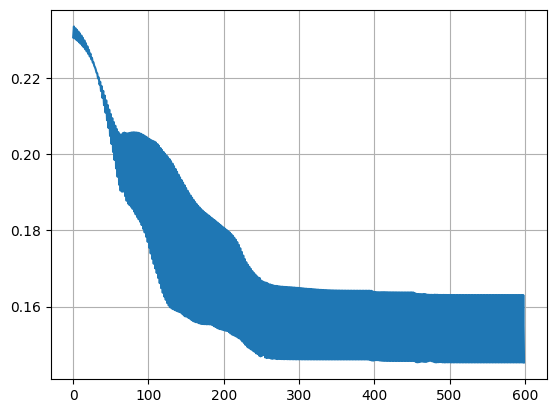

In [11]:
plt.plot(train_history)
plt.grid()
plt.show()